In [23]:
# importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import statistics
import calendar
import seaborn

In [24]:
# reading the required data into a dataframe
url="https://raw.githubusercontent.com/Uzo-Edoka/Analysis-of-Chicago-Crime-Data/main/chicago_crime_data.csv"
chicago_crime=pd.read_csv(url)

In [25]:
chicago_crime.head(5)  #IUCR is Illinois Uniform Crime Reporting (IUCR) Codes

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [26]:
# list of column names in the dataframe
chicago_crime.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

# I dropped redundant columns 

In [27]:
# dropping redundant columns: Unnamed: 0, ID, Latitude, Longitude

chicago_crime.drop(['Unnamed: 0', 'ID', 'Latitude', 'Longitude' ], axis = 1, inplace = True) 

In [28]:
# checking the shape of the dataframe
chicago_crime.shape

(1000, 19)

In [29]:
# display first 5 rows of the dataframe
chicago_crime.head(5) 

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
0,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)"


# I Created new columns for Months, Day, Season.

In [30]:
# creating the day column from date column
chicago_crime['Day'] = pd.to_datetime(chicago_crime['Date']).dt.day

In [31]:
# creating the month column from date column
chicago_crime['Month'] = pd.to_datetime(chicago_crime['Date']).dt.month

# Converting month integer to month name (coverting 5 to May, etc)
chicago_crime['Month'] = chicago_crime['Month'].apply(lambda x: calendar.month_abbr[x])

In [32]:
# creating the season column from month column 
season_dict = {'Jan': 'Winter',
               'Feb': 'Winter',
               'Mar': 'Spring', 
               'Apr': 'Spring',
               'May': 'Spring',
               'Jun': 'Summer',
               'Jul': 'Summer',
               'Aug': 'Summer',
               'Sep': 'Fall',
               'Oct': 'Fall',
               'Nov': 'Fall',
               'Dec': 'Winter'}
chicago_crime['Season'] = chicago_crime['Month'].apply(lambda x: season_dict[x])

In [33]:
# moving the Month column close to the date column for easy readability
Month_col = chicago_crime.pop('Month')
chicago_crime.insert(2, 'Month', Month_col)

In [34]:
# moving the Day column close to the date column for easy readability
Day_col = chicago_crime.pop('Day')
chicago_crime.insert(2, 'Day', Day_col)

In [35]:
# moving the Season column close to the month column for easy readability
Season_col = chicago_crime.pop('Season')
chicago_crime.insert(4, 'Season', Season_col)

In [36]:
chicago_crime.head(5)

,Case Number,Date,Day,Month,Season,Block,IUCR,Primary Type,Description,Location Description,...,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
0,HP485721,07/26/2008 02:30:00 PM,26,Jul,Summer,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,...,423,4.0,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,"(41.739979622, -87.555120042)"
1,JB372830,07/31/2018 10:57:00 AM,31,Jul,Summer,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,...,413,4.0,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,"(41.726922145, -87.599746995)"
2,HN308568,04/27/2007 10:30:00 AM,27,Apr,Spring,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,...,1711,17.0,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,"(41.994137622, -87.734959049)"
3,JB361368,07/23/2018 08:55:00 AM,23,Jul,Summer,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,...,1115,11.0,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,"(41.881217483, -87.730589961)"
4,JE297624,07/11/2021 06:40:00 AM,11,Jul,Summer,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),...,1231,12.0,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,"(41.874173691, -87.668082118)"


#  Obtaining the Months, Days & Seasons with the highest crime record. Visualizing the types of crimes committed within these Months, Days, Seasons & what crimes are highest and lowest.

### Day with the most crime record and what crimes are highest and lowest?

In [37]:
# Day with the most crime record
chicago_crime['Day'].mode()

0    21
Name: Day, dtype: int64

In [38]:
# creating a subset of Day 21 (Day with the most crime record) 
day21_crime = chicago_crime[chicago_crime.Day == 21]

In [39]:
# Grouping the different types of crimes in Day 21 and their frequency of occurence
day21_crime.groupby('Primary Type')['Day'].count() 

Primary Type
ASSAULT                             7
BATTERY                             6
BURGLARY                            4
CRIMINAL DAMAGE                     2
CRIMINAL TRESPASS                   1
DECEPTIVE PRACTICE                  3
INTERFERENCE WITH PUBLIC OFFICER    1
MOTOR VEHICLE THEFT                 1
NARCOTICS                           5
OTHER OFFENSE                       4
ROBBERY                             2
THEFT                               8
WEAPONS VIOLATION                   1
Name: Day, dtype: int64

<Axes: title={'center': 'Distribution of crimes on Day 21'}, xlabel='Primary Type', ylabel='Frequency'>

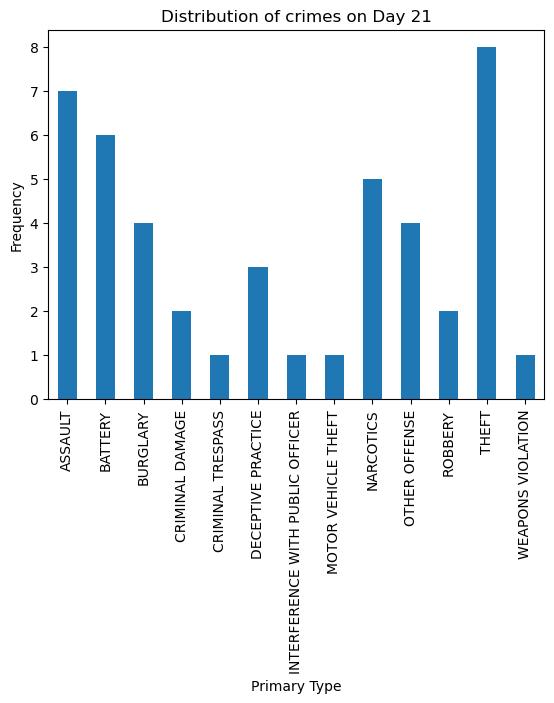

In [40]:
# Bar chart showing distribution of crimes commited in Day 21
day21_crime.groupby('Primary Type')['Day'].count().plot(kind='bar', title='Distribution of crimes on Day 21', ylabel='Frequency')

### Month with the most crime record and what crimes are highest and lowest?

In [41]:
# Month with the most crime record
chicago_crime['Month'].mode()

0    Apr
Name: Month, dtype: object

In [42]:
# creating a subset of April (Month with the most crime record) 
april_crime = chicago_crime[chicago_crime.Month == 'Apr']

In [43]:
# Grouping the different types of crimes in April and their frequency of occurence
april_crime.groupby('Primary Type')['Month'].count()

Primary Type
ASSAULT                    3
BATTERY                   17
BURGLARY                   7
CRIM SEXUAL ASSAULT        1
CRIMINAL DAMAGE            9
CRIMINAL TRESPASS          2
DECEPTIVE PRACTICE         2
LIQUOR LAW VIOLATION       1
MOTOR VEHICLE THEFT        2
NARCOTICS                 19
OTHER OFFENSE              7
PUBLIC PEACE VIOLATION     1
ROBBERY                    5
THEFT                     23
WEAPONS VIOLATION          2
Name: Month, dtype: int64

In [87]:
april_crime_count = april_crime_count.sort_values(ascending=False)
april_crime_count

Primary Type
THEFT                     23
NARCOTICS                 19
BATTERY                   17
CRIMINAL DAMAGE            9
BURGLARY                   7
OTHER OFFENSE              7
ROBBERY                    5
ASSAULT                    3
CRIMINAL TRESPASS          2
DECEPTIVE PRACTICE         2
MOTOR VEHICLE THEFT        2
WEAPONS VIOLATION          2
CRIM SEXUAL ASSAULT        1
LIQUOR LAW VIOLATION       1
PUBLIC PEACE VIOLATION     1
Name: Month, dtype: int64

In [112]:
april_crime_count = april_crime.groupby('Primary Type')['Month'].count()

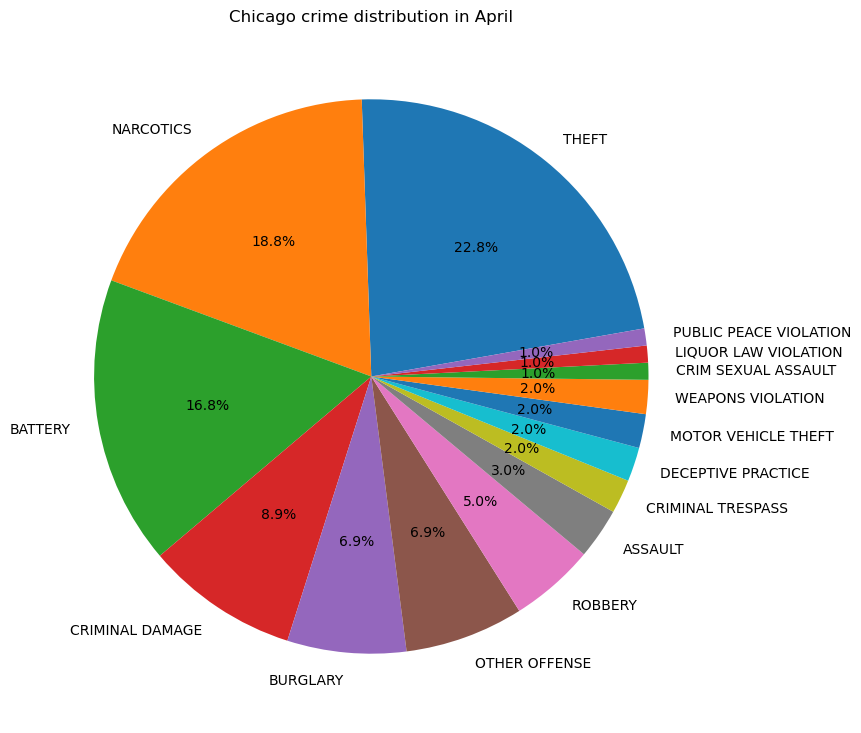

In [113]:
# Pie chart showing distribution of crimes commited in Chicago in the month of April 
plot = april_crime_count.sort_values(ascending=False).plot.pie(y='april_crime_count.sort_values(ascending=False)', title="Chicago crime distribution in April", legend=False, \
                   autopct='%1.1f%%', rot=0, startangle=10, figsize=(9, 9), label ='')

### Season with the most crime records and what crimes are highest and lowest?

In [114]:
# Season with the most crime record
chicago_crime['Season'].mode()

0    Spring
Name: Season, dtype: object

In [115]:
# creating a subset of Spring (Season with the most crime record) 
spring_crime = chicago_crime[chicago_crime.Season == 'Spring']

In [116]:
# Grouping the different types of crimes in spring and their frequency of occurence
spring_crime.groupby('Primary Type')['Season'].count()

Primary Type
ASSAULT                       10
BATTERY                       55
BURGLARY                      15
CRIM SEXUAL ASSAULT            1
CRIMINAL DAMAGE               25
CRIMINAL TRESPASS              5
DECEPTIVE PRACTICE            11
INTIMIDATION                   1
LIQUOR LAW VIOLATION           1
MOTOR VEHICLE THEFT            7
NARCOTICS                     45
OFFENSE INVOLVING CHILDREN     1
OTHER OFFENSE                 17
PROSTITUTION                   3
PUBLIC PEACE VIOLATION         1
ROBBERY                       11
SEX OFFENSE                    1
THEFT                         51
WEAPONS VIOLATION              3
Name: Season, dtype: int64

<Axes: title={'center': 'Distribution of crimes in Spring Season'}, xlabel='Primary Type', ylabel='Frequency'>

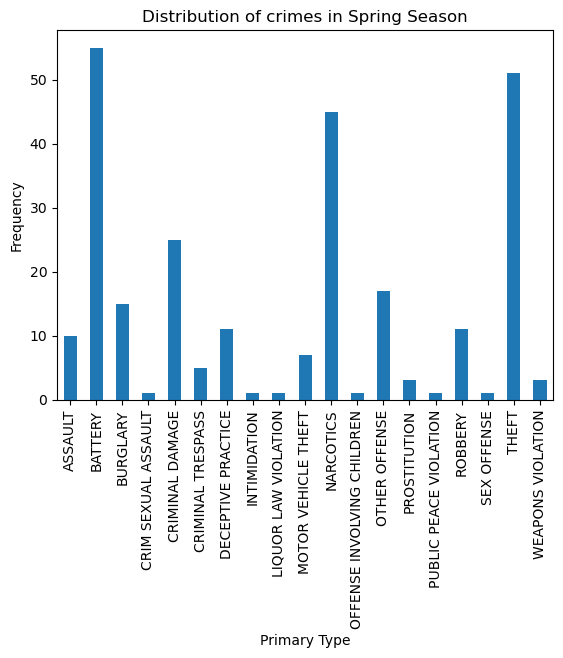

In [117]:
# Bar chart showing distribution of crimes commited in Spring
spring_crime.groupby('Primary Type')['Season'].count().plot(kind='bar', title='Distribution of crimes in Spring Season', ylabel='Frequency')

#  The location where crime happened the most

In [118]:
# Where crime happen the most according to location description?
most_crime_location = chicago_crime['Location Description'].mode().to_string(index=False)
print(f'Most crime happen in the {most_crime_location}.') 

Most crime happen in the STREET.
